In [5]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from extractors import von_neumann, elias, universal_hash
from utils import compute_bias


import numpy as np
import matplotlib.pyplot as plt


In [11]:

raw_bits = np.random.choice([0,1], size=1000, p=[0.8,0.2]).tolist()
print(f"Raw bias = {compute_bias(raw_bits):.3f}, length = {len(raw_bits)}")


Raw bias = 0.298, length = 1000


In [12]:

import sys, os
from pathlib import Path


p = Path().resolve()


while not (p / "extractors").is_dir():
    if p.parent == p:
        raise RuntimeError("Could not find project root (no 'extractors/' folder).")
    p = p.parent

project_root = p  


os.chdir(project_root)


if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"✔️ Project root: {project_root}")
print(f"✔️ Working dir:   {os.getcwd()}")


✔️ Project root: C:\Users\ereci\OneDrive\Desktop\QRANDOPT\QRANDOPT
✔️ Working dir:   C:\Users\ereci\OneDrive\Desktop\QRANDOPT\QRANDOPT


In [ ]:

import importlib, subprocess, sys

if importlib.util.find_spec("pytest") is None:
    print("Installing pytest…")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pytest"])
else:
    print("pytest already installed")


pytest already installed


Extractor | Bias before | Bias after | Output len
--------- | ----------- | ---------- | ----------
     VN | 0.298      | 0.037     | 160
  Elias | 0.298      | 0.324     | 763
   Hash | 0.298      | 0.031     | 256


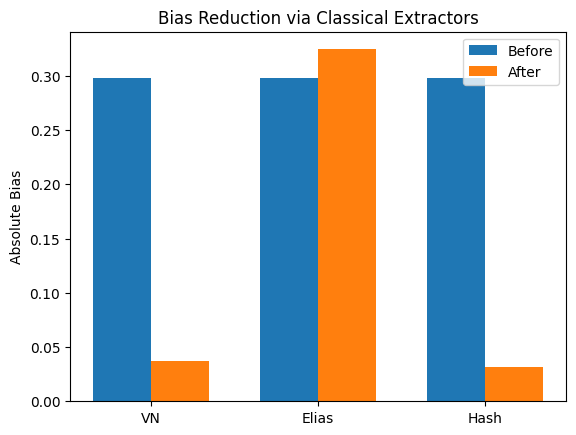

....                                                                     [100%]
4 passed in 0.02s


<ExitCode.OK: 0>

In [15]:

from extractors import von_neumann, elias, universal_hash
from utils      import compute_bias

import numpy as np
import matplotlib.pyplot as plt
import pytest

#Generate a toy biased stream
raw_bits = np.random.choice([0,1], size=1000, p=[0.8,0.2]).tolist()

# Apply basic extractors & compute bias
results = {}
for name, fn in [("VN", von_neumann),
                 ("Elias", elias),
                 ("Hash", universal_hash)]:
    out = fn(raw_bits)
    results[name] = (compute_bias(raw_bits), compute_bias(out), len(out))


print("Extractor | Bias before | Bias after | Output len")
print("--------- | ----------- | ---------- | ----------")
for name, (b0, b1, L) in results.items():
    print(f"{name:>7} | {b0:.3f}      | {b1:.3f}     | {L}")

# Plot bias reduction
labels = list(results.keys())
before = [v[0] for v in results.values()]
after  = [v[1] for v in results.values()]
x = np.arange(len(labels)); w = 0.35
fig, ax = plt.subplots()
ax.bar(x-w/2, before, w, label="Before")
ax.bar(x+w/2, after,  w, label="After")
ax.set_xticks(x); ax.set_xticklabels(labels)
ax.set_ylabel("Absolute Bias")
ax.set_title("Bias Reduction via Classical Extractors")
ax.legend()
plt.show()


pytest.main(["-q", "--disable-warnings", "--maxfail=1"])


In [10]:
import numpy as np



for N in [1000, 5000, 20000]:
    raw = np.random.choice([0,1], N, p=[0.8,0.2]).tolist()
    out = elias(raw)
    print(f"N={N:<5d} | before={compute_bias(raw):.3f} | after={compute_bias(out):.3f} | len={len(out)}")


N=1000  | before=0.285 | after=0.313 | len=801
N=5000  | before=0.302 | after=0.318 | len=4104
N=20000 | before=0.304 | after=0.317 | len=16905
